# Gradient Descent Intro
 <p>

In [1]:
from __future__ import print_function, division
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

In [2]:
%matplotlib inline

In [3]:
rc('animation', html='html5')
rcParams['figure.figsize'] = 8, 8
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [4]:
def lin(a,b,x): return a*x+b

In [5]:
a=3.
b=8.

In [6]:
n=30
x = random(n)
y = lin(a,b,x)

In [7]:
x

array([0.1669, 0.3306, 0.8431, 0.6566, 0.9308, 0.7809, 0.5566, 0.6834, 0.8454, 0.7343, 0.7095,
       0.8074, 0.2168, 0.268 , 0.421 , 0.13  , 0.6744, 0.2203, 0.6307, 0.8288, 0.3665, 0.0801,
       0.8037, 0.7328, 0.9914, 0.7839, 0.7599, 0.4341, 0.8091, 0.7343])

In [8]:
y

array([ 8.5007,  8.9918, 10.5293,  9.9699, 10.7923, 10.3428,  9.6697, 10.0502, 10.5363, 10.2028,
       10.1285, 10.4222,  8.6504,  8.8039,  9.263 ,  8.3899, 10.0233,  8.6609,  9.892 , 10.4864,
        9.0996,  8.2404, 10.4112, 10.1985, 10.9743, 10.3517, 10.2796,  9.3023, 10.4274, 10.2028])

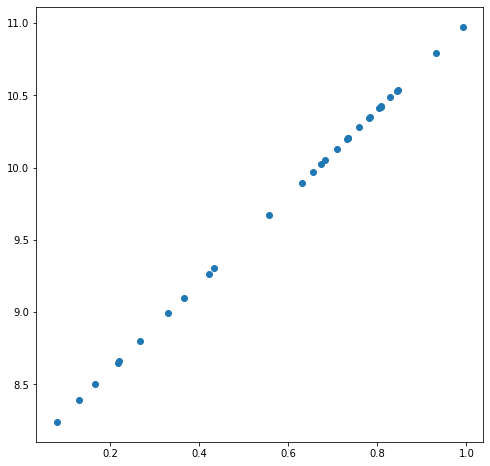

In [9]:
plt.scatter(x,y)

In [10]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [11]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.447617157677023

In [12]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [13]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [14]:
fig = plt.figure(dpi=300, figsize=(8, 8))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)

ani.save('GD.mp4')